The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the
market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand
the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided 
represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify
the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 


In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import datetime as dt
import math

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

In [2]:
cab = pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
# changing the type of Date of Travel datatype into DateTime 
a = cab['Date of Travel'].to_list()
ts = pd.Timestamp('1899-12-29')
dates = [ts + pd.DateOffset(date_offset) for date_offset in a]
cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [6]:
city = pd.read_csv("city.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:

city['Population'] = [x.replace(',','') for x in city['Population']]
city['Population'] = city['Population'].astype(float)

city['Users'] = [x.replace(',','') for x in city['Users']]
city['Users'] = city['Users'].astype(float)

In [10]:
customer_id = pd.read_csv("Customer_ID.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [12]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
transaction_id = pd.read_csv("Transaction_ID.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [15]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [16]:
xyz = pd.merge(transaction_id,cab).merge(customer_id).merge(city)
xyz.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,814885.0,24701.0
1,10351127,29290,Cash,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,814885.0,24701.0
2,10412921,29290,Card,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,814885.0,24701.0
3,10000012,27703,Card,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,814885.0,24701.0
4,10320494,27703,Card,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,814885.0,24701.0


In [17]:
#Analyze using visualization tool
corr_matrix = xyz.corr()
corr_matrix

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.016912,-0.001429,-0.052902,-0.003462,-0.001267,-0.001570,0.023868,0.013526
Customer ID,-0.016912,1.000000,0.000389,-0.177324,0.003077,-0.004735,-0.013608,-0.647052,-0.610742
KM Travelled,-0.001429,0.000389,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,-0.177324,0.835753,1.000000,0.859812,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.003077,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.015108,0.023628
Age,-0.001267,-0.004735,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.013608,-0.000544,0.003228,-0.000633,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.647052,-0.002311,0.326589,0.015108,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.610742,-0.000428,0.281061,0.023628,-0.005906,0.010464,0.915490,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap of G2M Insight for Cab Investment'}>

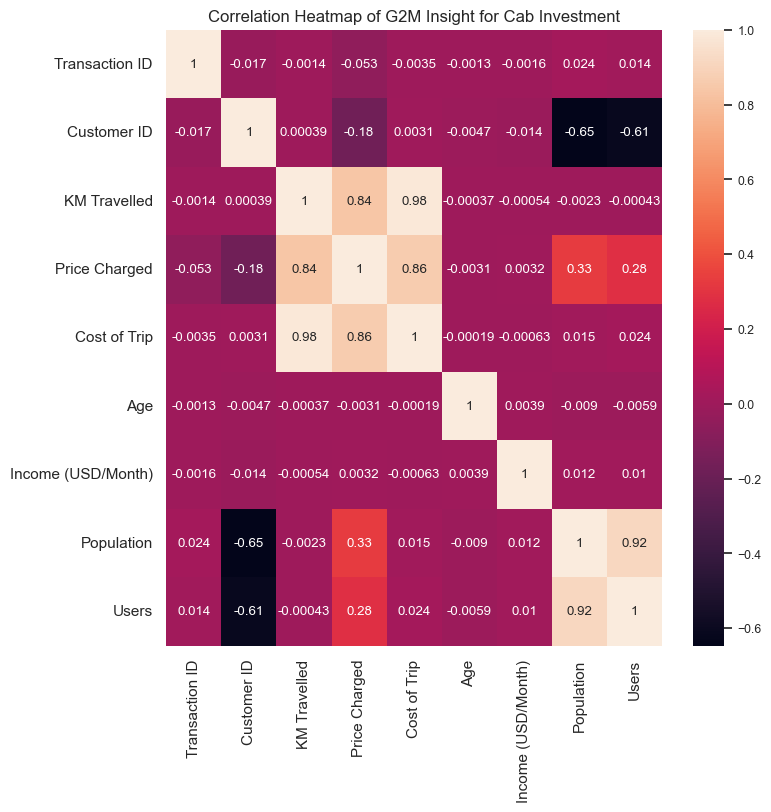

In [18]:
plt.figure(figsize=(8,8))
# Set the title 
plt.title('Correlation Heatmap of G2M Insight for Cab Investment')

# Set the size of text
sns.set(font_scale = 0.8)
          
sns.heatmap(corr_matrix, annot = True)

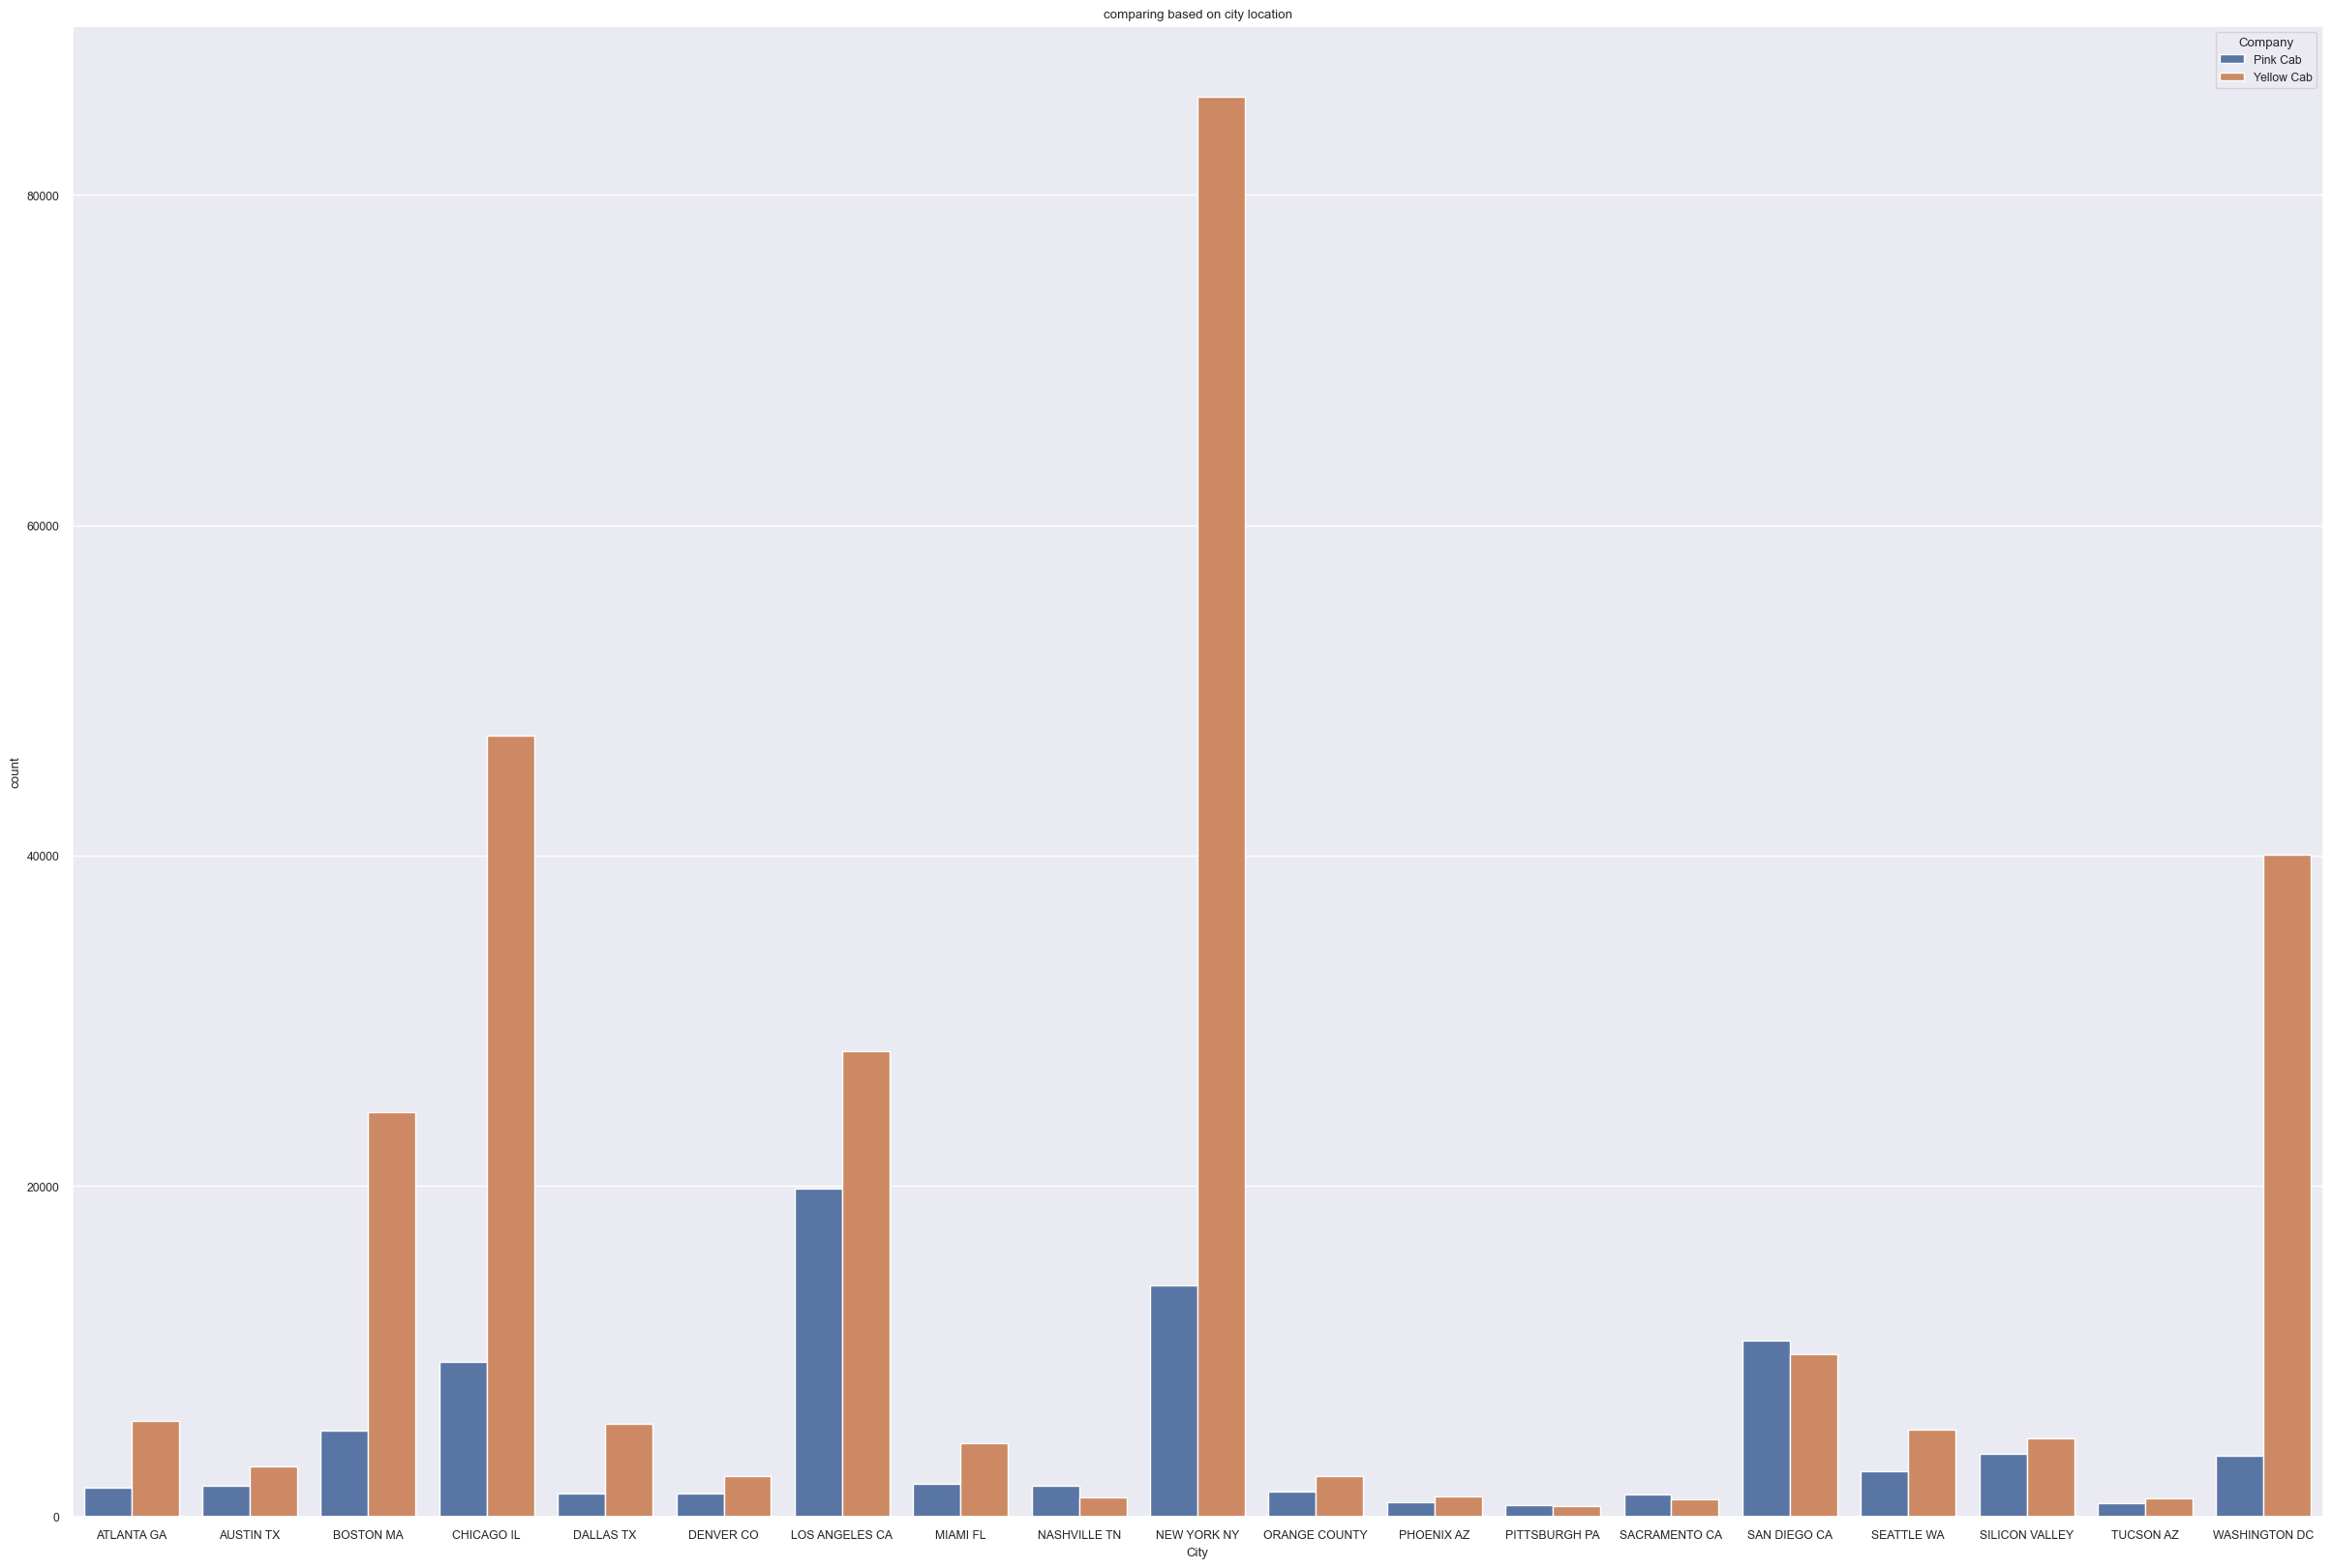

In [19]:
plt.figure(figsize=(30,20))
sns.countplot(x='City',hue='Company',data=xyz)
plt.title('comparing based on city location')
plt.savefig("comparing cabs based on city location")

Yellow cabs are more than pink cabs in majority of the cities

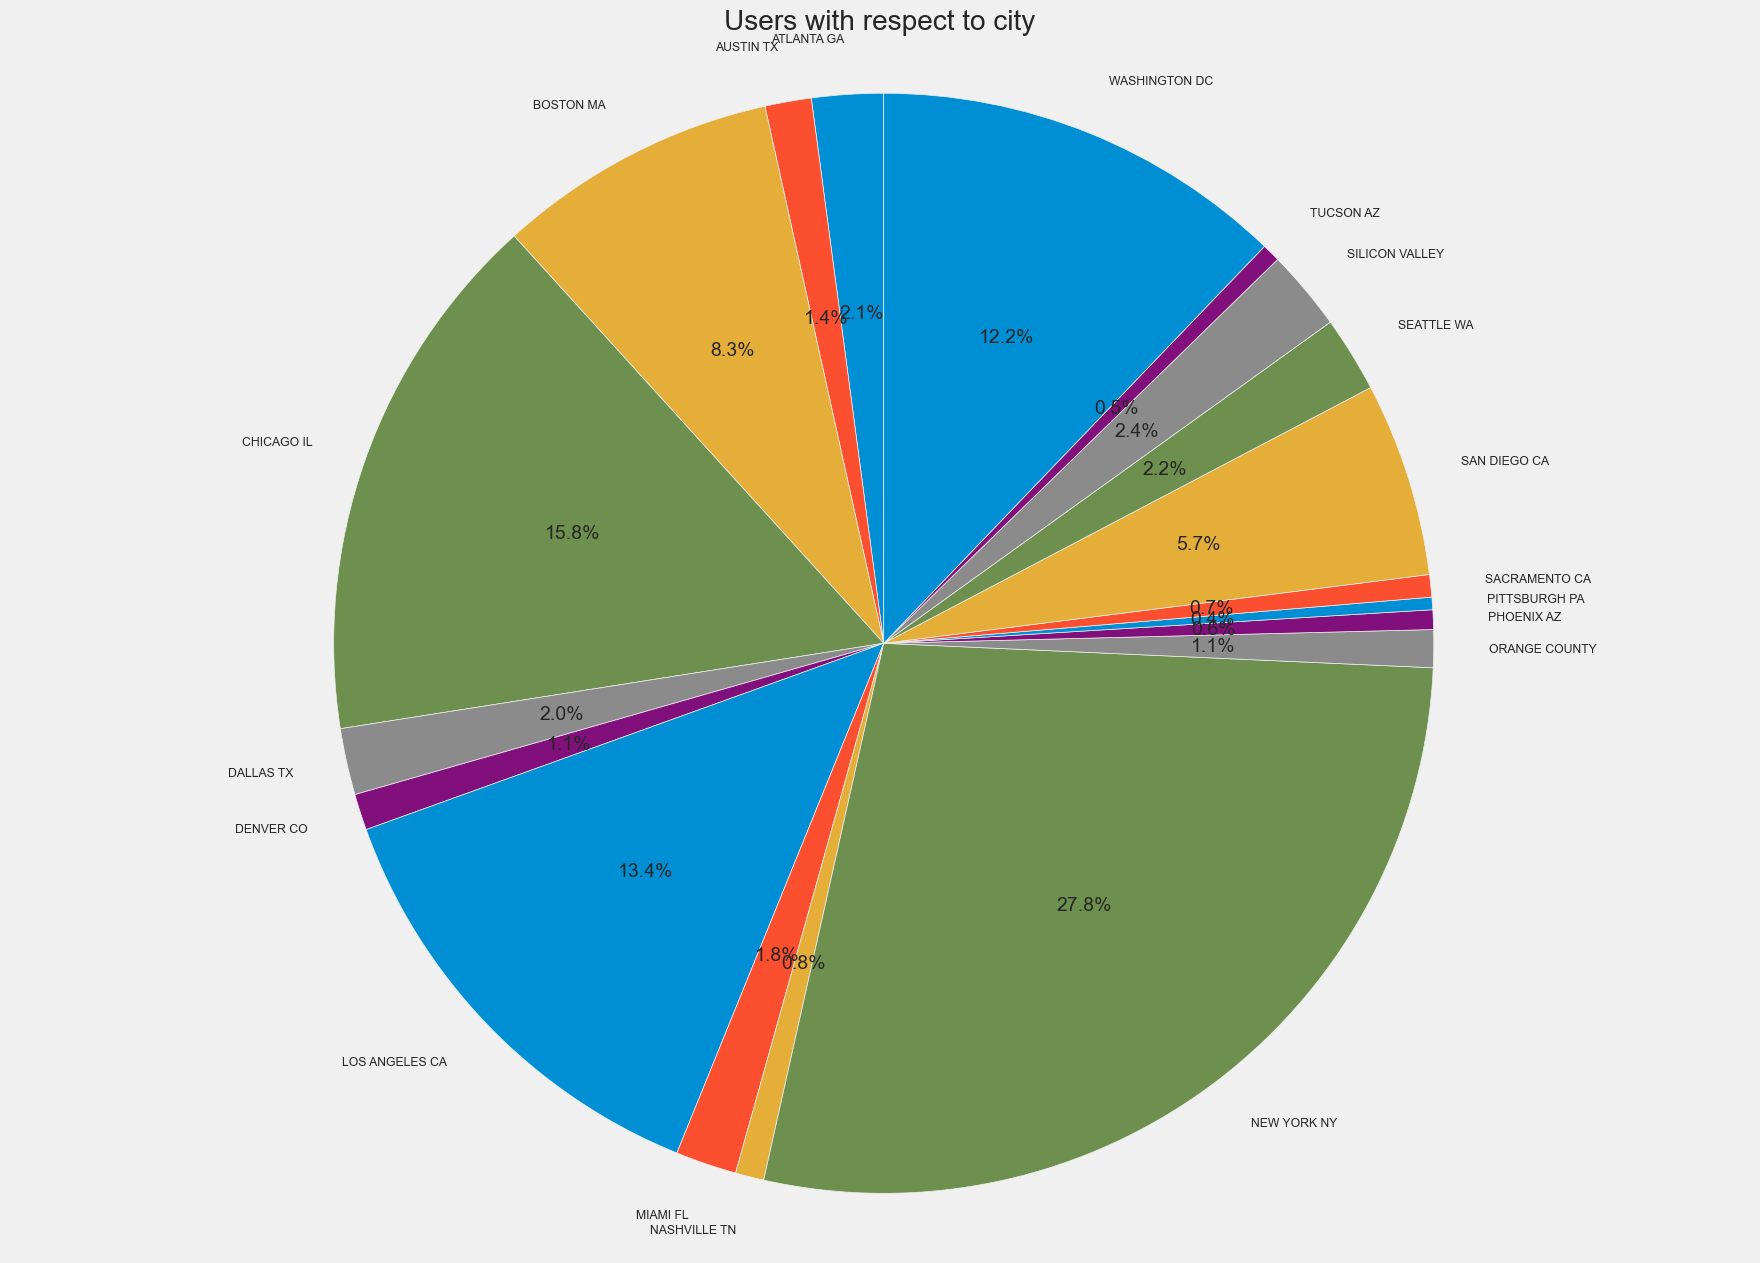

In [20]:
city_users = xyz.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
values = city_users.values
plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(20,15))
axp.pie(values, labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')
plt.title('Users with respect to city')
plt.savefig('Users with respect to city')

 New York has the higest number of cab users

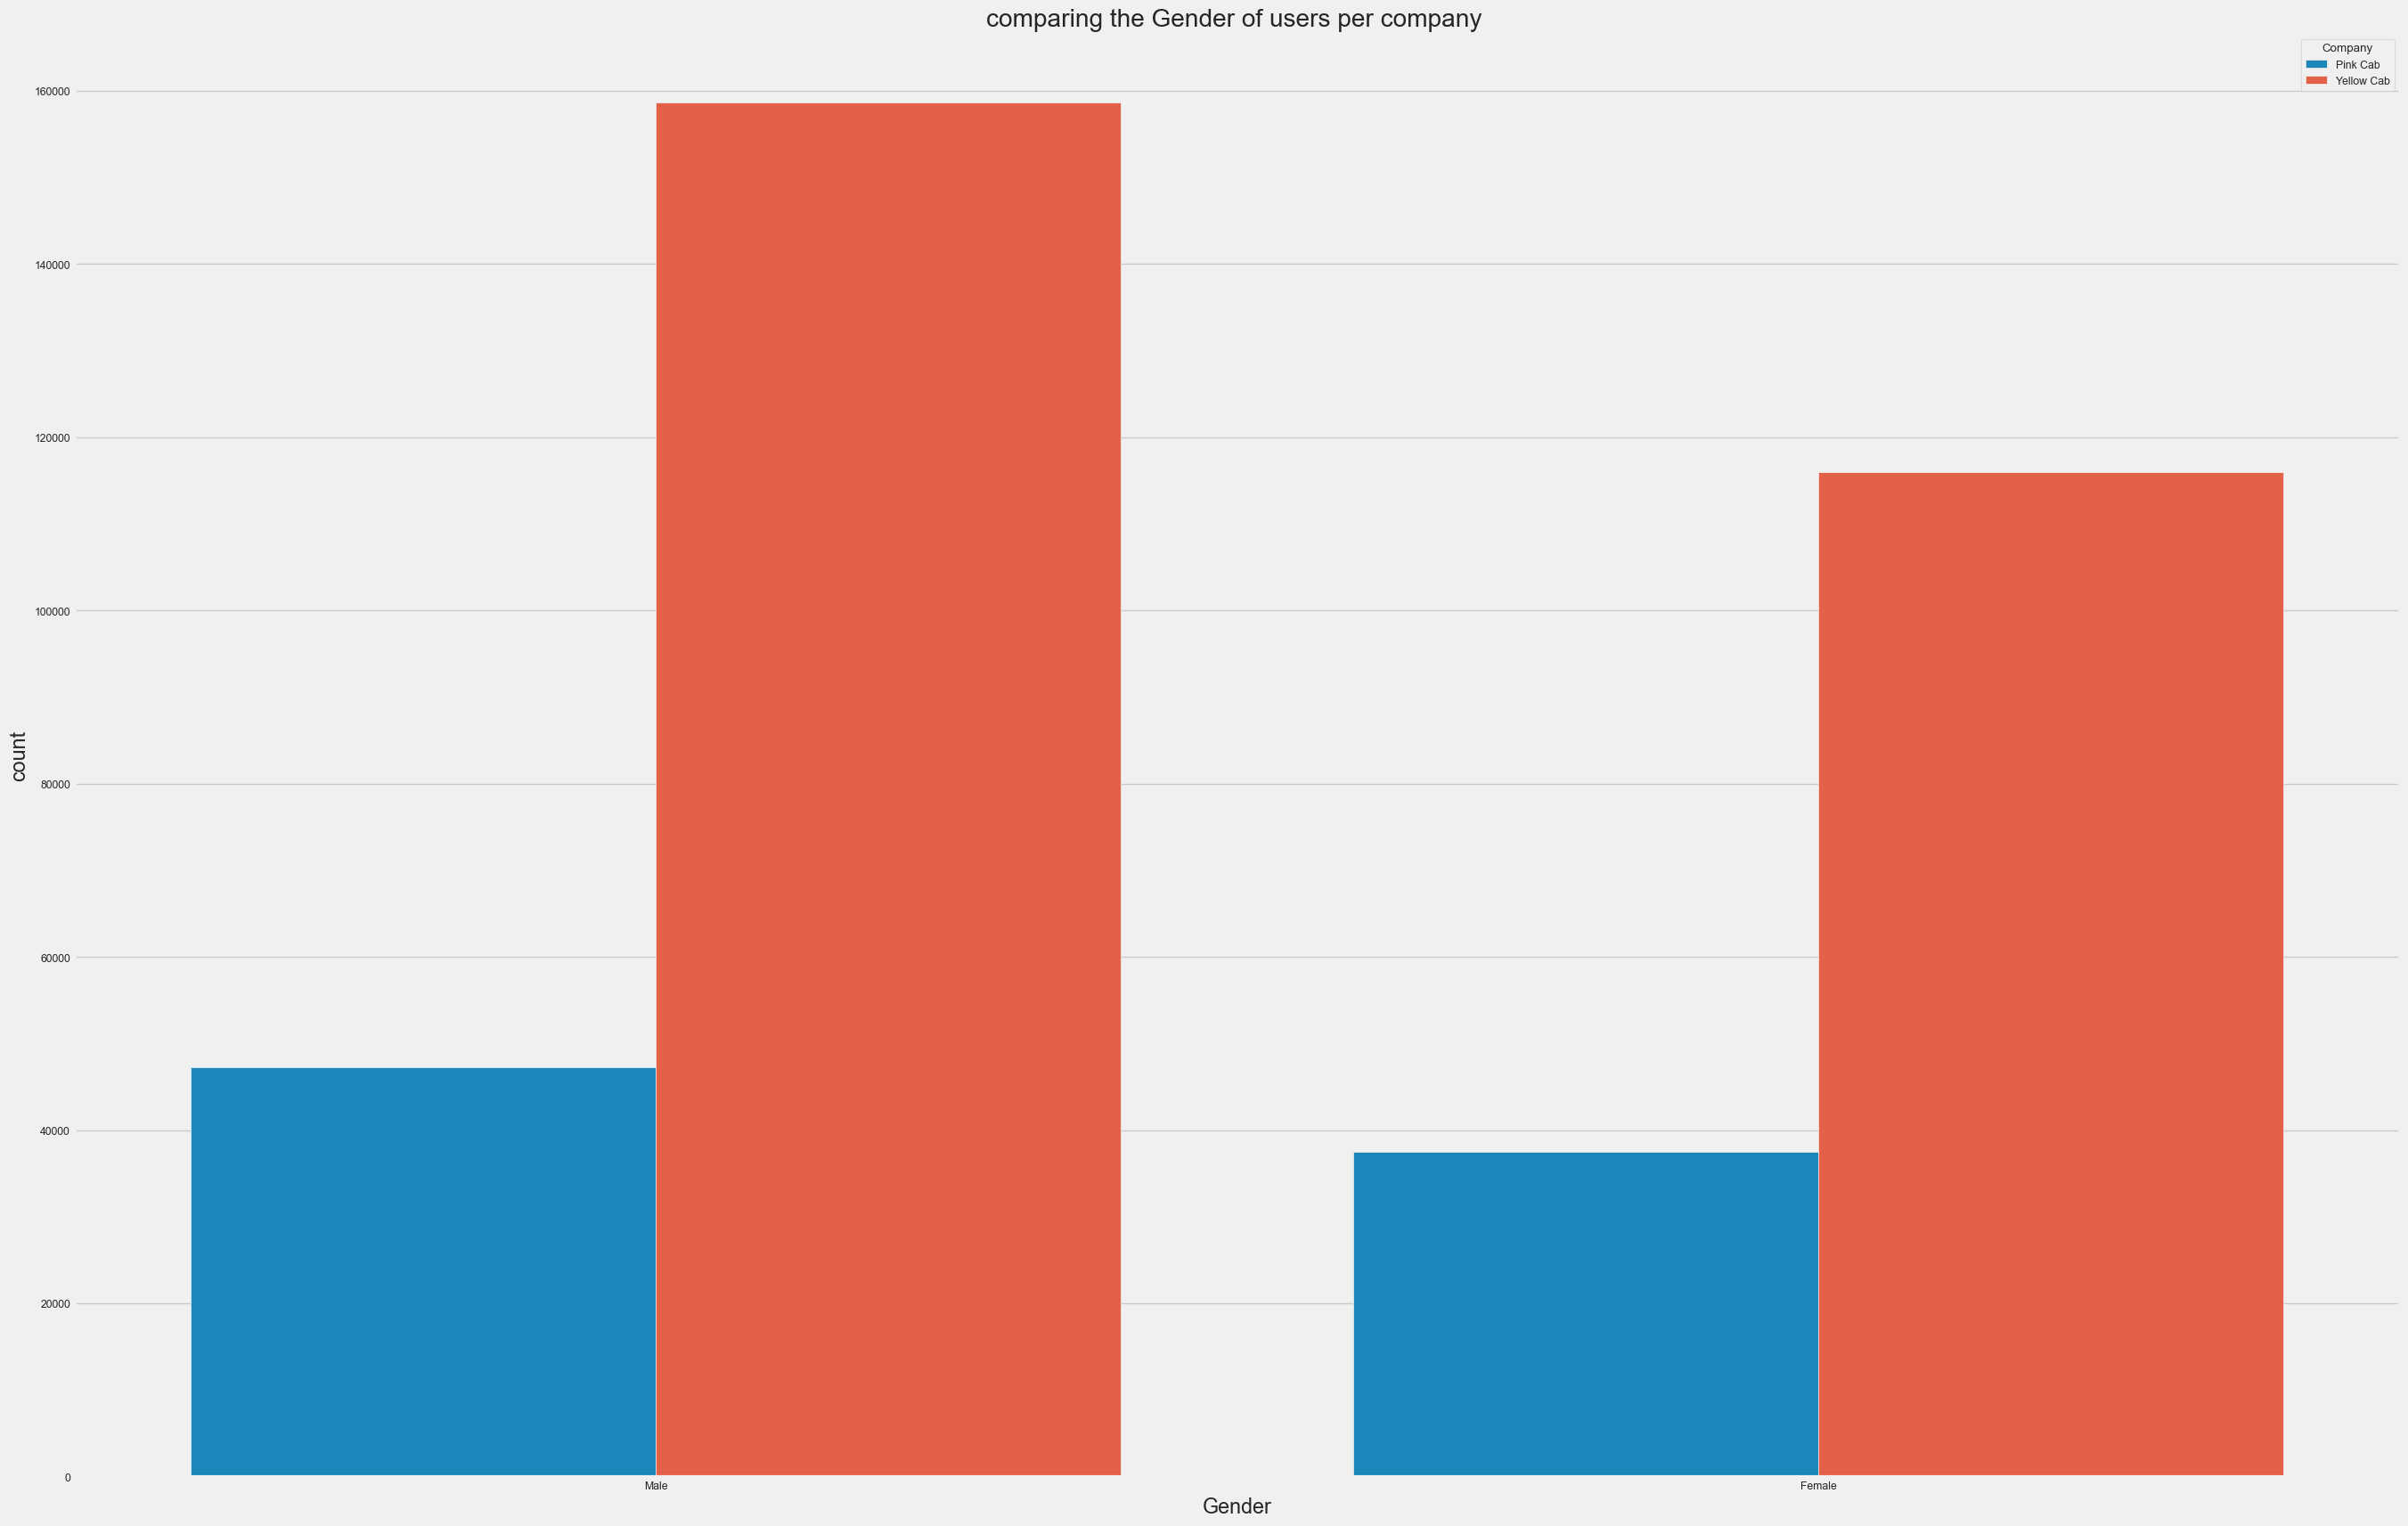

In [21]:
plt.figure(figsize=(30,20))
sns.countplot(x='Gender',hue='Company',data=xyz)
plt.title('comparing the Gender of users per company ')
plt.savefig("comparing the Gender of users per company")

Male users are more than female users

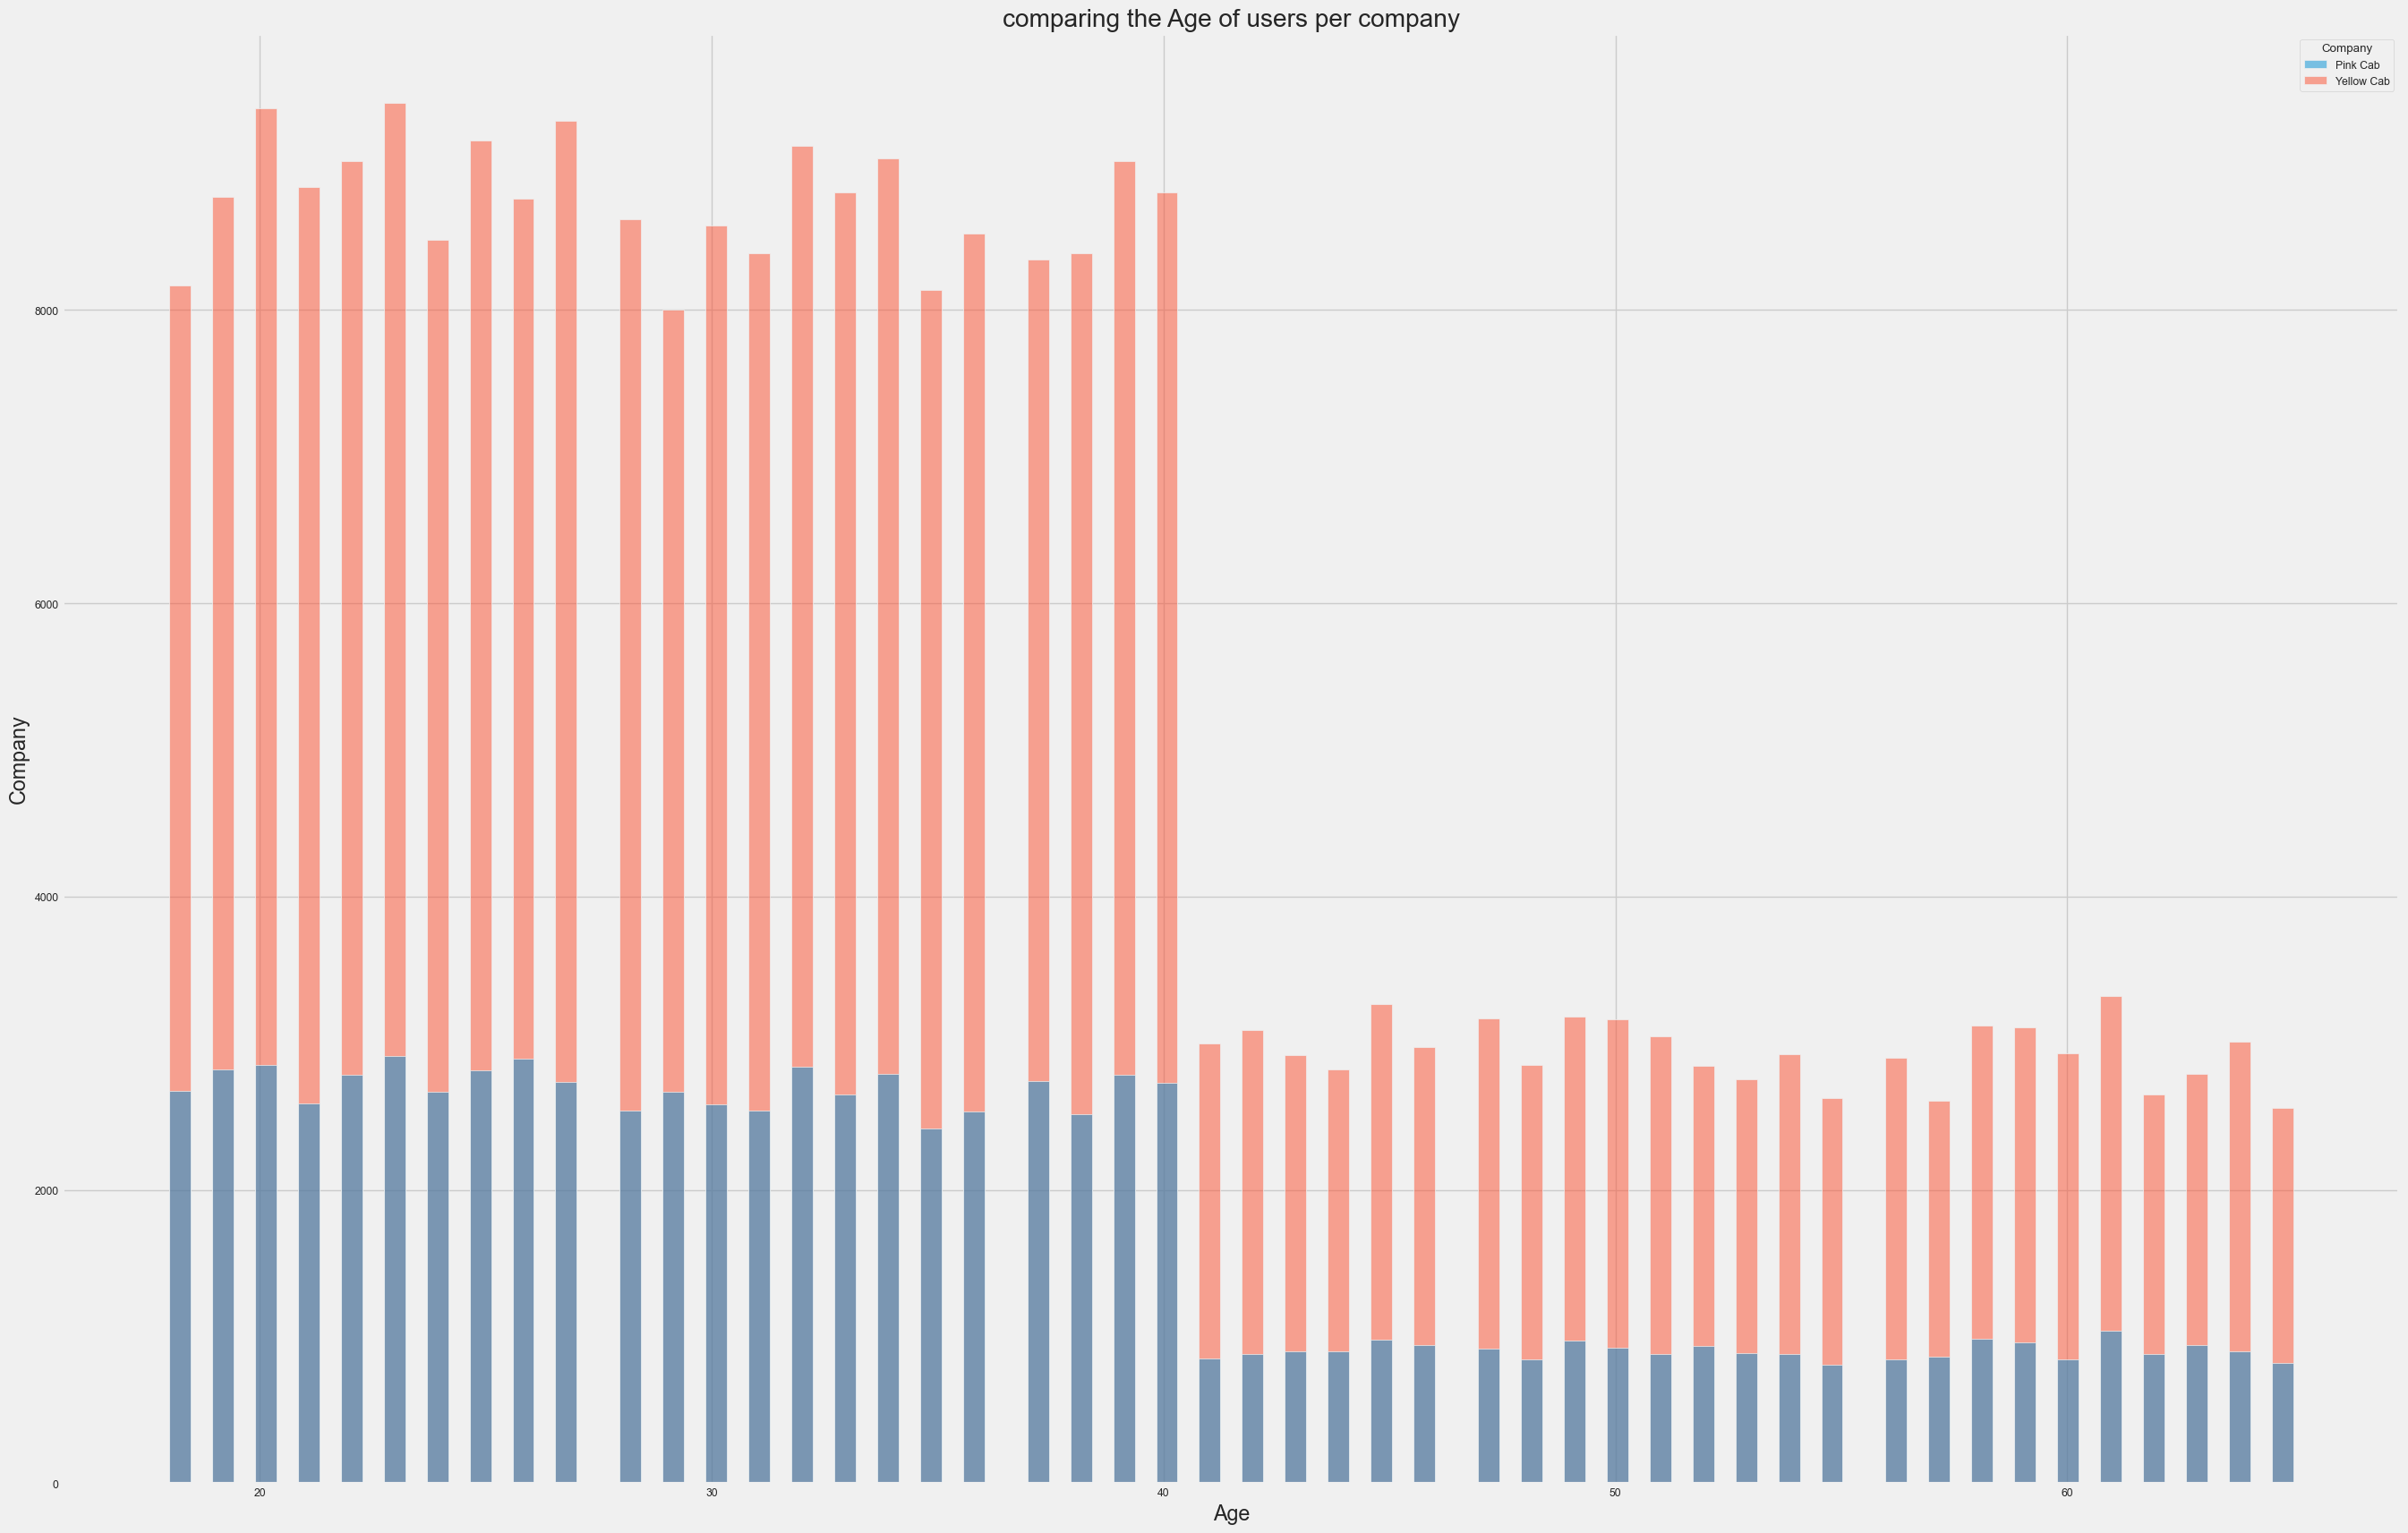

In [22]:
plt.figure(figsize=(30,20))
sns.histplot(x='Age',hue='Company',data=xyz)
plt.ylabel('Company')
plt.title('comparing the Age of users per company')
plt.savefig("comparing the Age of users per company")

Yellow cab has more users within different age group

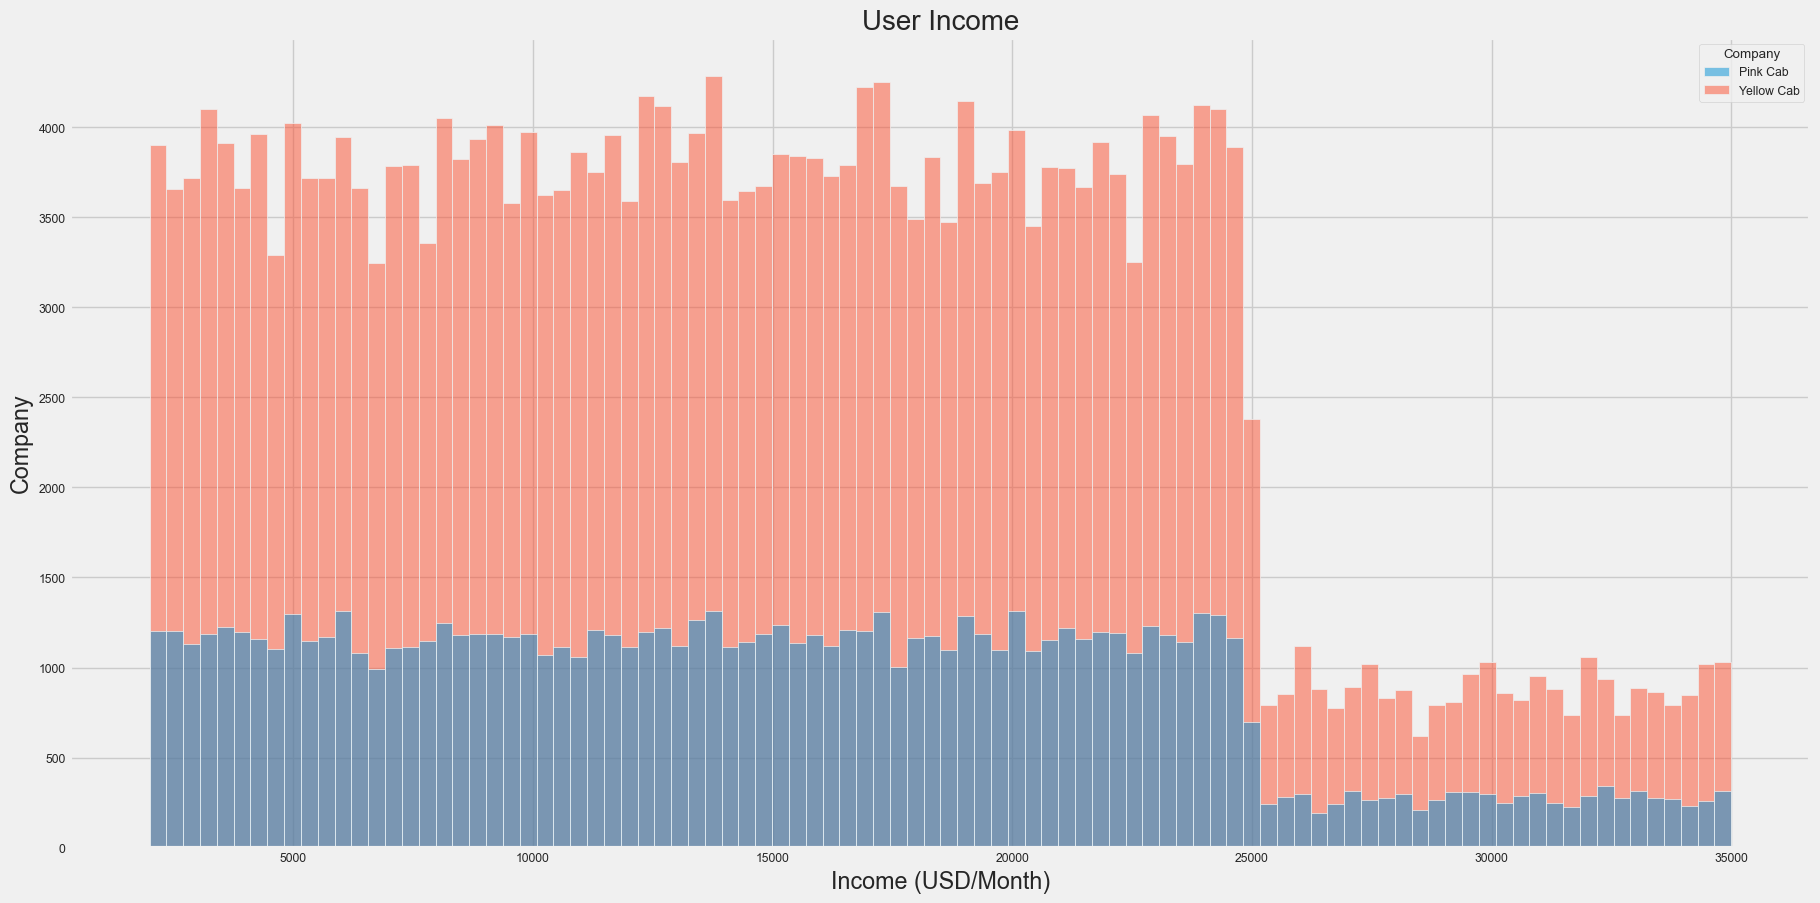

In [23]:
plt.figure(figsize = (20, 10))
#sns.countplot(xyz['Company'], xyz['Income (USD/Month)'])
sns.histplot(x='Income (USD/Month)',hue='Company',data=xyz)
#sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.ylabel('Company')
plt.title('User Income', fontsize=20)
plt.savefig('User Income')

In [24]:
xyz['Profit'] = xyz['Price Charged']-xyz['Cost of Trip']
xyz.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,29290,Card,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,814885.0,24701.0,57.3150
1,10351127,29290,Cash,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,814885.0,24701.0,281.2772
2,10412921,29290,Card,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,814885.0,24701.0,194.6480
3,10000012,27703,Card,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,814885.0,24701.0,23.6660
4,10320494,27703,Card,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,814885.0,24701.0,253.9808


In [25]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  float64       
 13  Users               359392 no

Yellow cab has the highest profit over pink cab

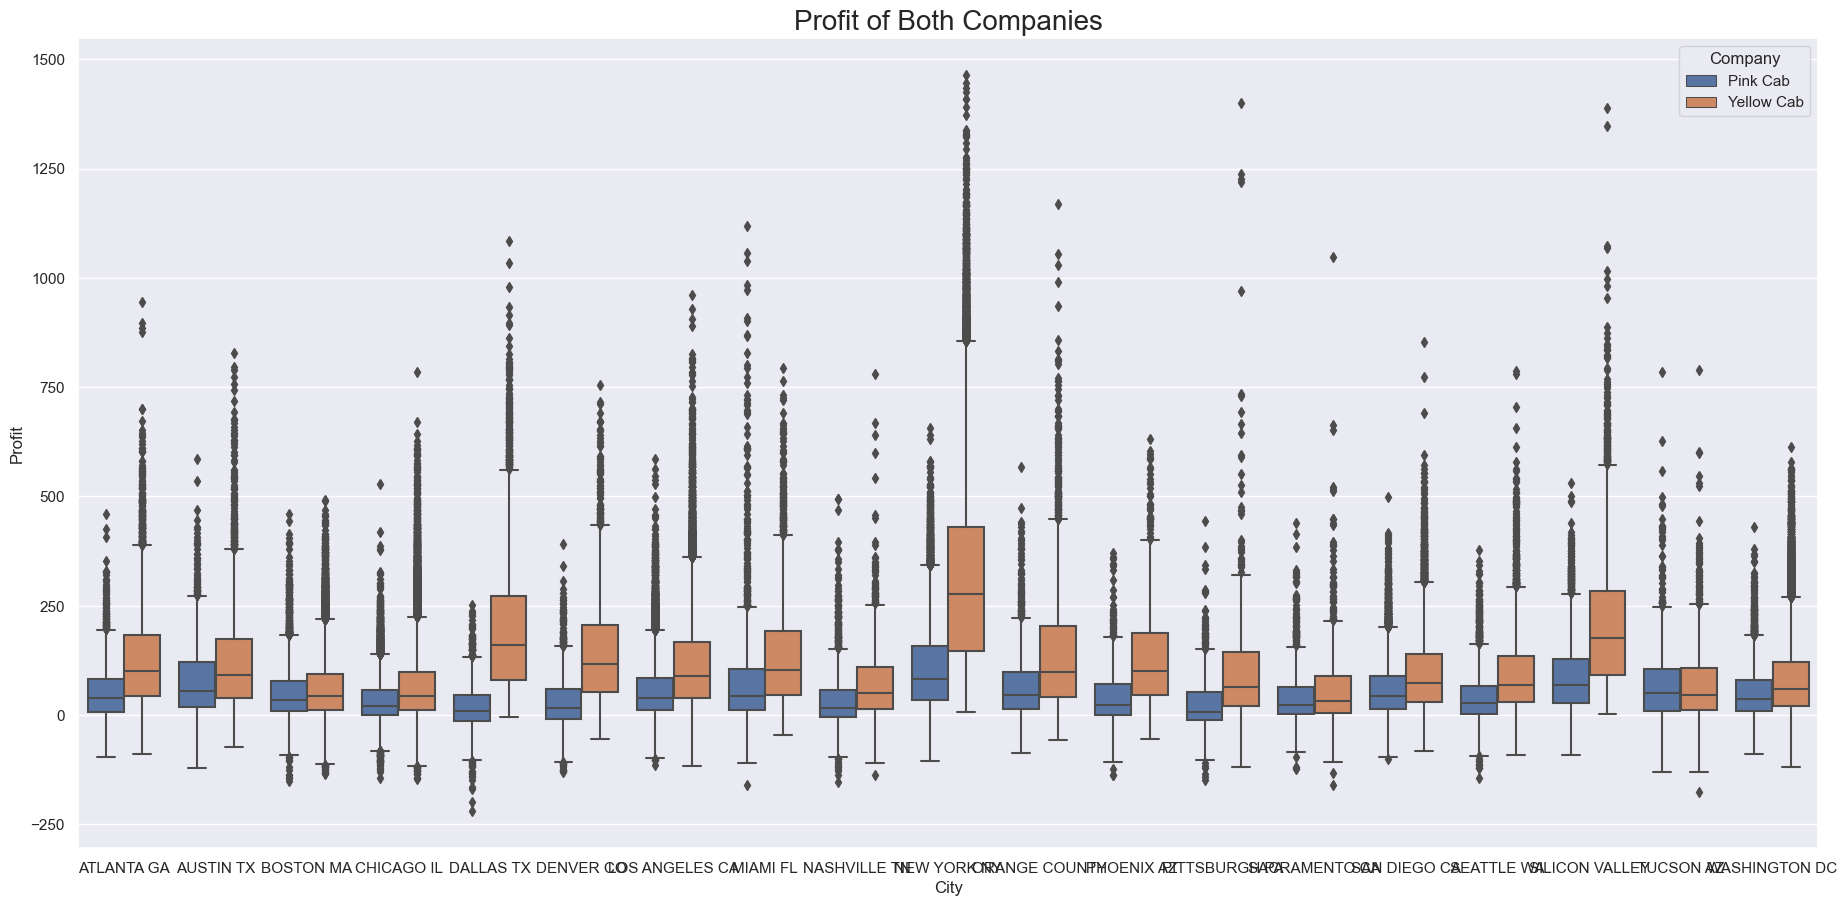

In [26]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 10))
sns.boxplot(x='City', y='Profit', hue='Company', data=xyz)
#sns.boxplot(xyz['Company'], xyz['Profit'])
plt.title('Profit of Both Companies', fontsize=20)
plt.savefig('Profit of Both Companies')

Yellow cab has the highest profit over pink cab in all the cities

Yellow cab made more profit compared to Pink cab

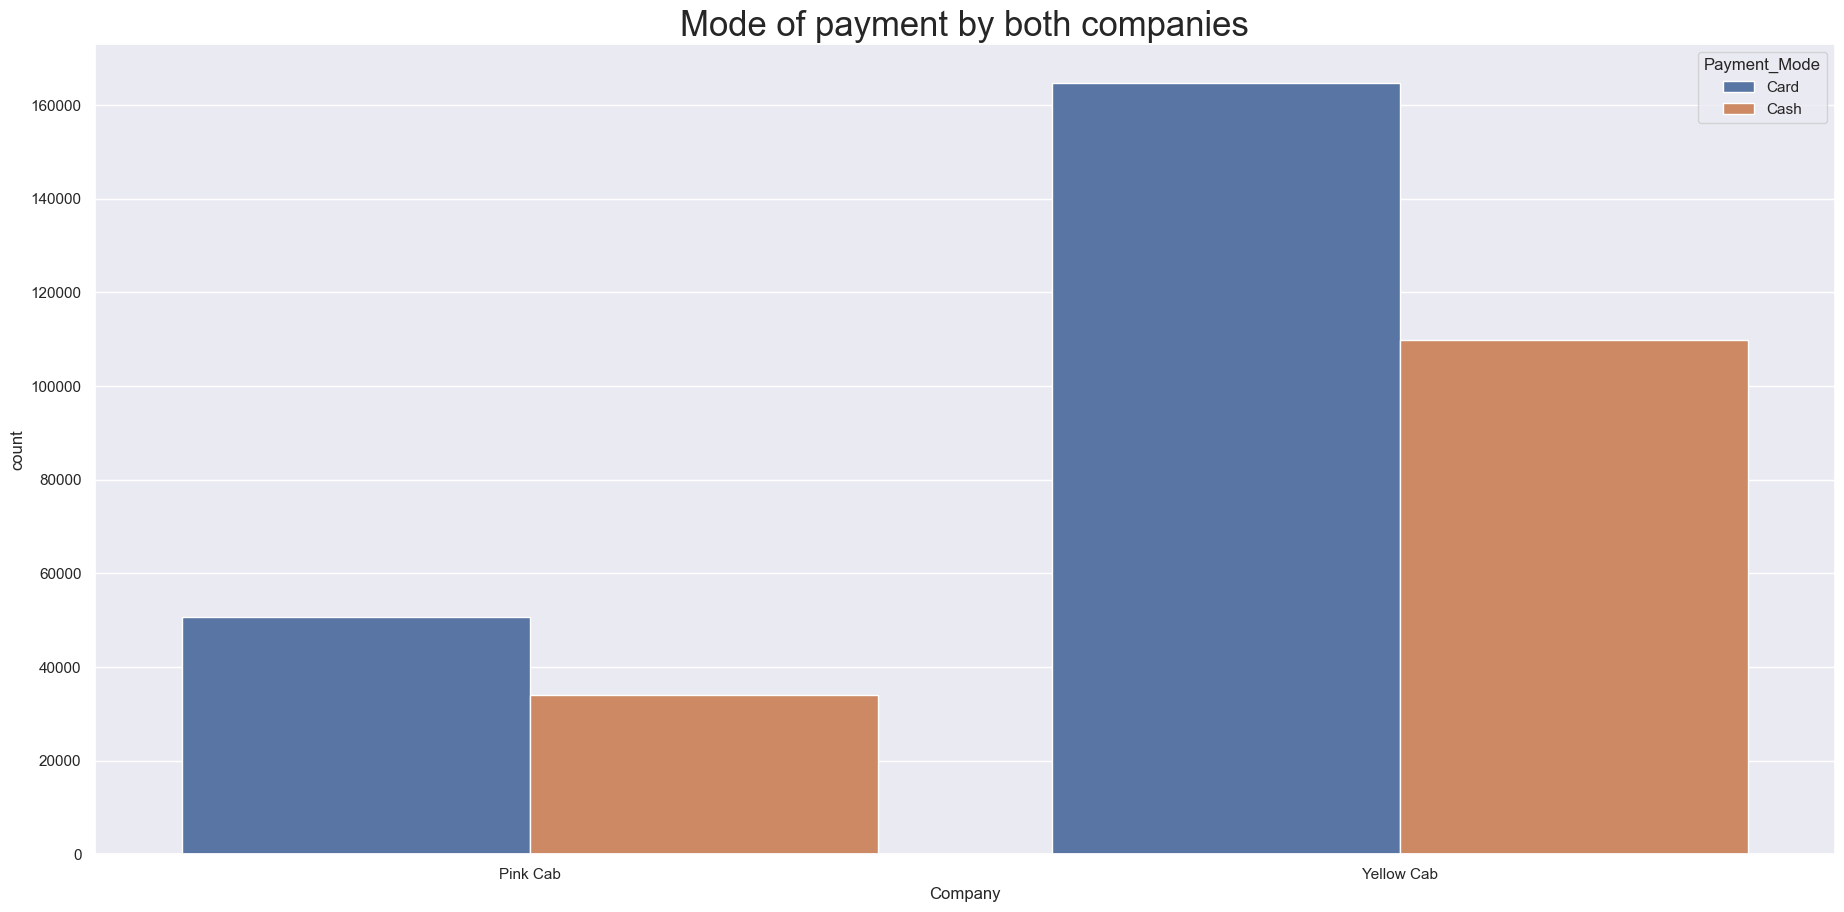

In [27]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=xyz)
plt.title('Mode of payment by both companies', fontsize=25)
plt.show()

Majority of customers in both companies use card as mode of payment

In [28]:
company_cab=xyz.groupby(['Company','City']).count()
company_cab  = company_cab['Transaction ID']
print(company_cab)

Company     City          
Pink Cab    ATLANTA GA         1762
            AUSTIN TX          1868
            BOSTON MA          5186
            CHICAGO IL         9361
            DALLAS TX          1380
            DENVER CO          1394
            LOS ANGELES CA    19865
            MIAMI FL           2002
            NASHVILLE TN       1841
            NEW YORK NY       13967
            ORANGE COUNTY      1513
            PHOENIX AZ          864
            PITTSBURGH PA       682
            SACRAMENTO CA      1334
            SAN DIEGO CA      10672
            SEATTLE WA         2732
            SILICON VALLEY     3797
            TUCSON AZ           799
            WASHINGTON DC      3692
Yellow Cab  ATLANTA GA         5795
            AUSTIN TX          3028
            BOSTON MA         24506
            CHICAGO IL        47264
            DALLAS TX          5637
            DENVER CO          2431
            LOS ANGELES CA    28168
            MIAMI FL           4452
 

In [29]:
xyz['Year'] = xyz['Date of Travel'].dt.year
xyz['Month'] = xyz['Date of Travel'].dt.month
xyz['Day'] = xyz['Date of Travel'].dt.day

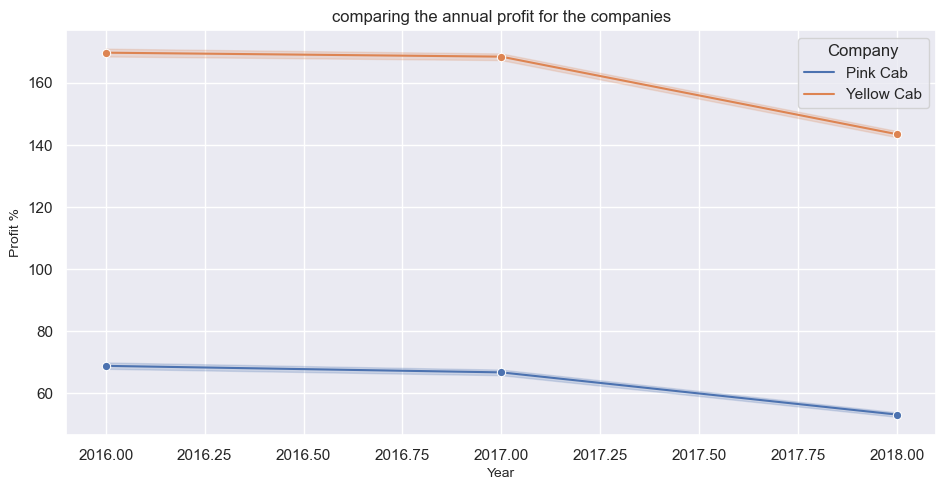

In [30]:
plt.figure(figsize = (10, 5))
sns.lineplot(x='Year', y='Profit', hue="Company", data=xyz, marker='o')
plt.xlabel("Year", size=10)
plt.ylabel("Profit %", size=10)
plt.title('comparing the annual profit for the companies')
plt.savefig('comparing the annual profit for the companies')

Yellow bus made the highest profit per annum

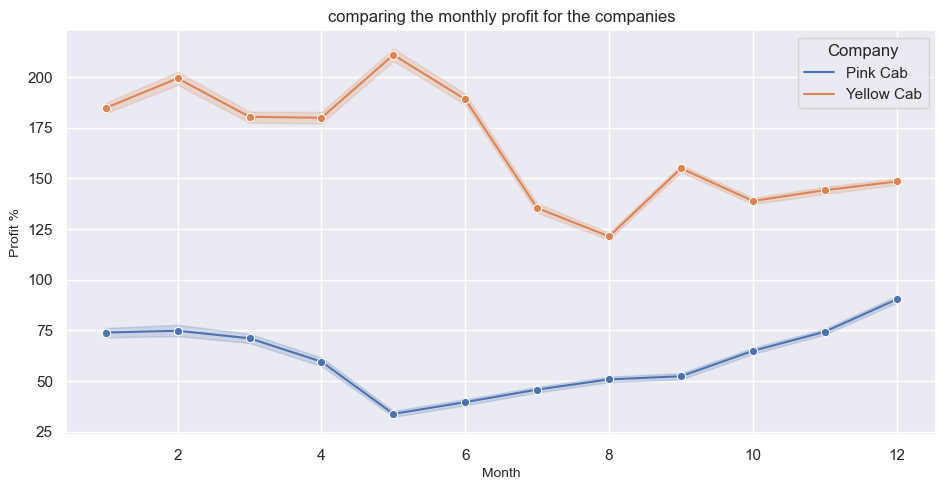

In [31]:
plt.figure(figsize = (10, 5))
sns.lineplot(x='Month', y='Profit', hue="Company", data=xyz, marker='o')
plt.xlabel('Month', size=10)
plt.ylabel("Profit %", size=10)
plt.title('comparing the monthly profit for the companies')
plt.savefig('comparing the monthly profit for the companies')

Yellow cab generated the highest monthly profit

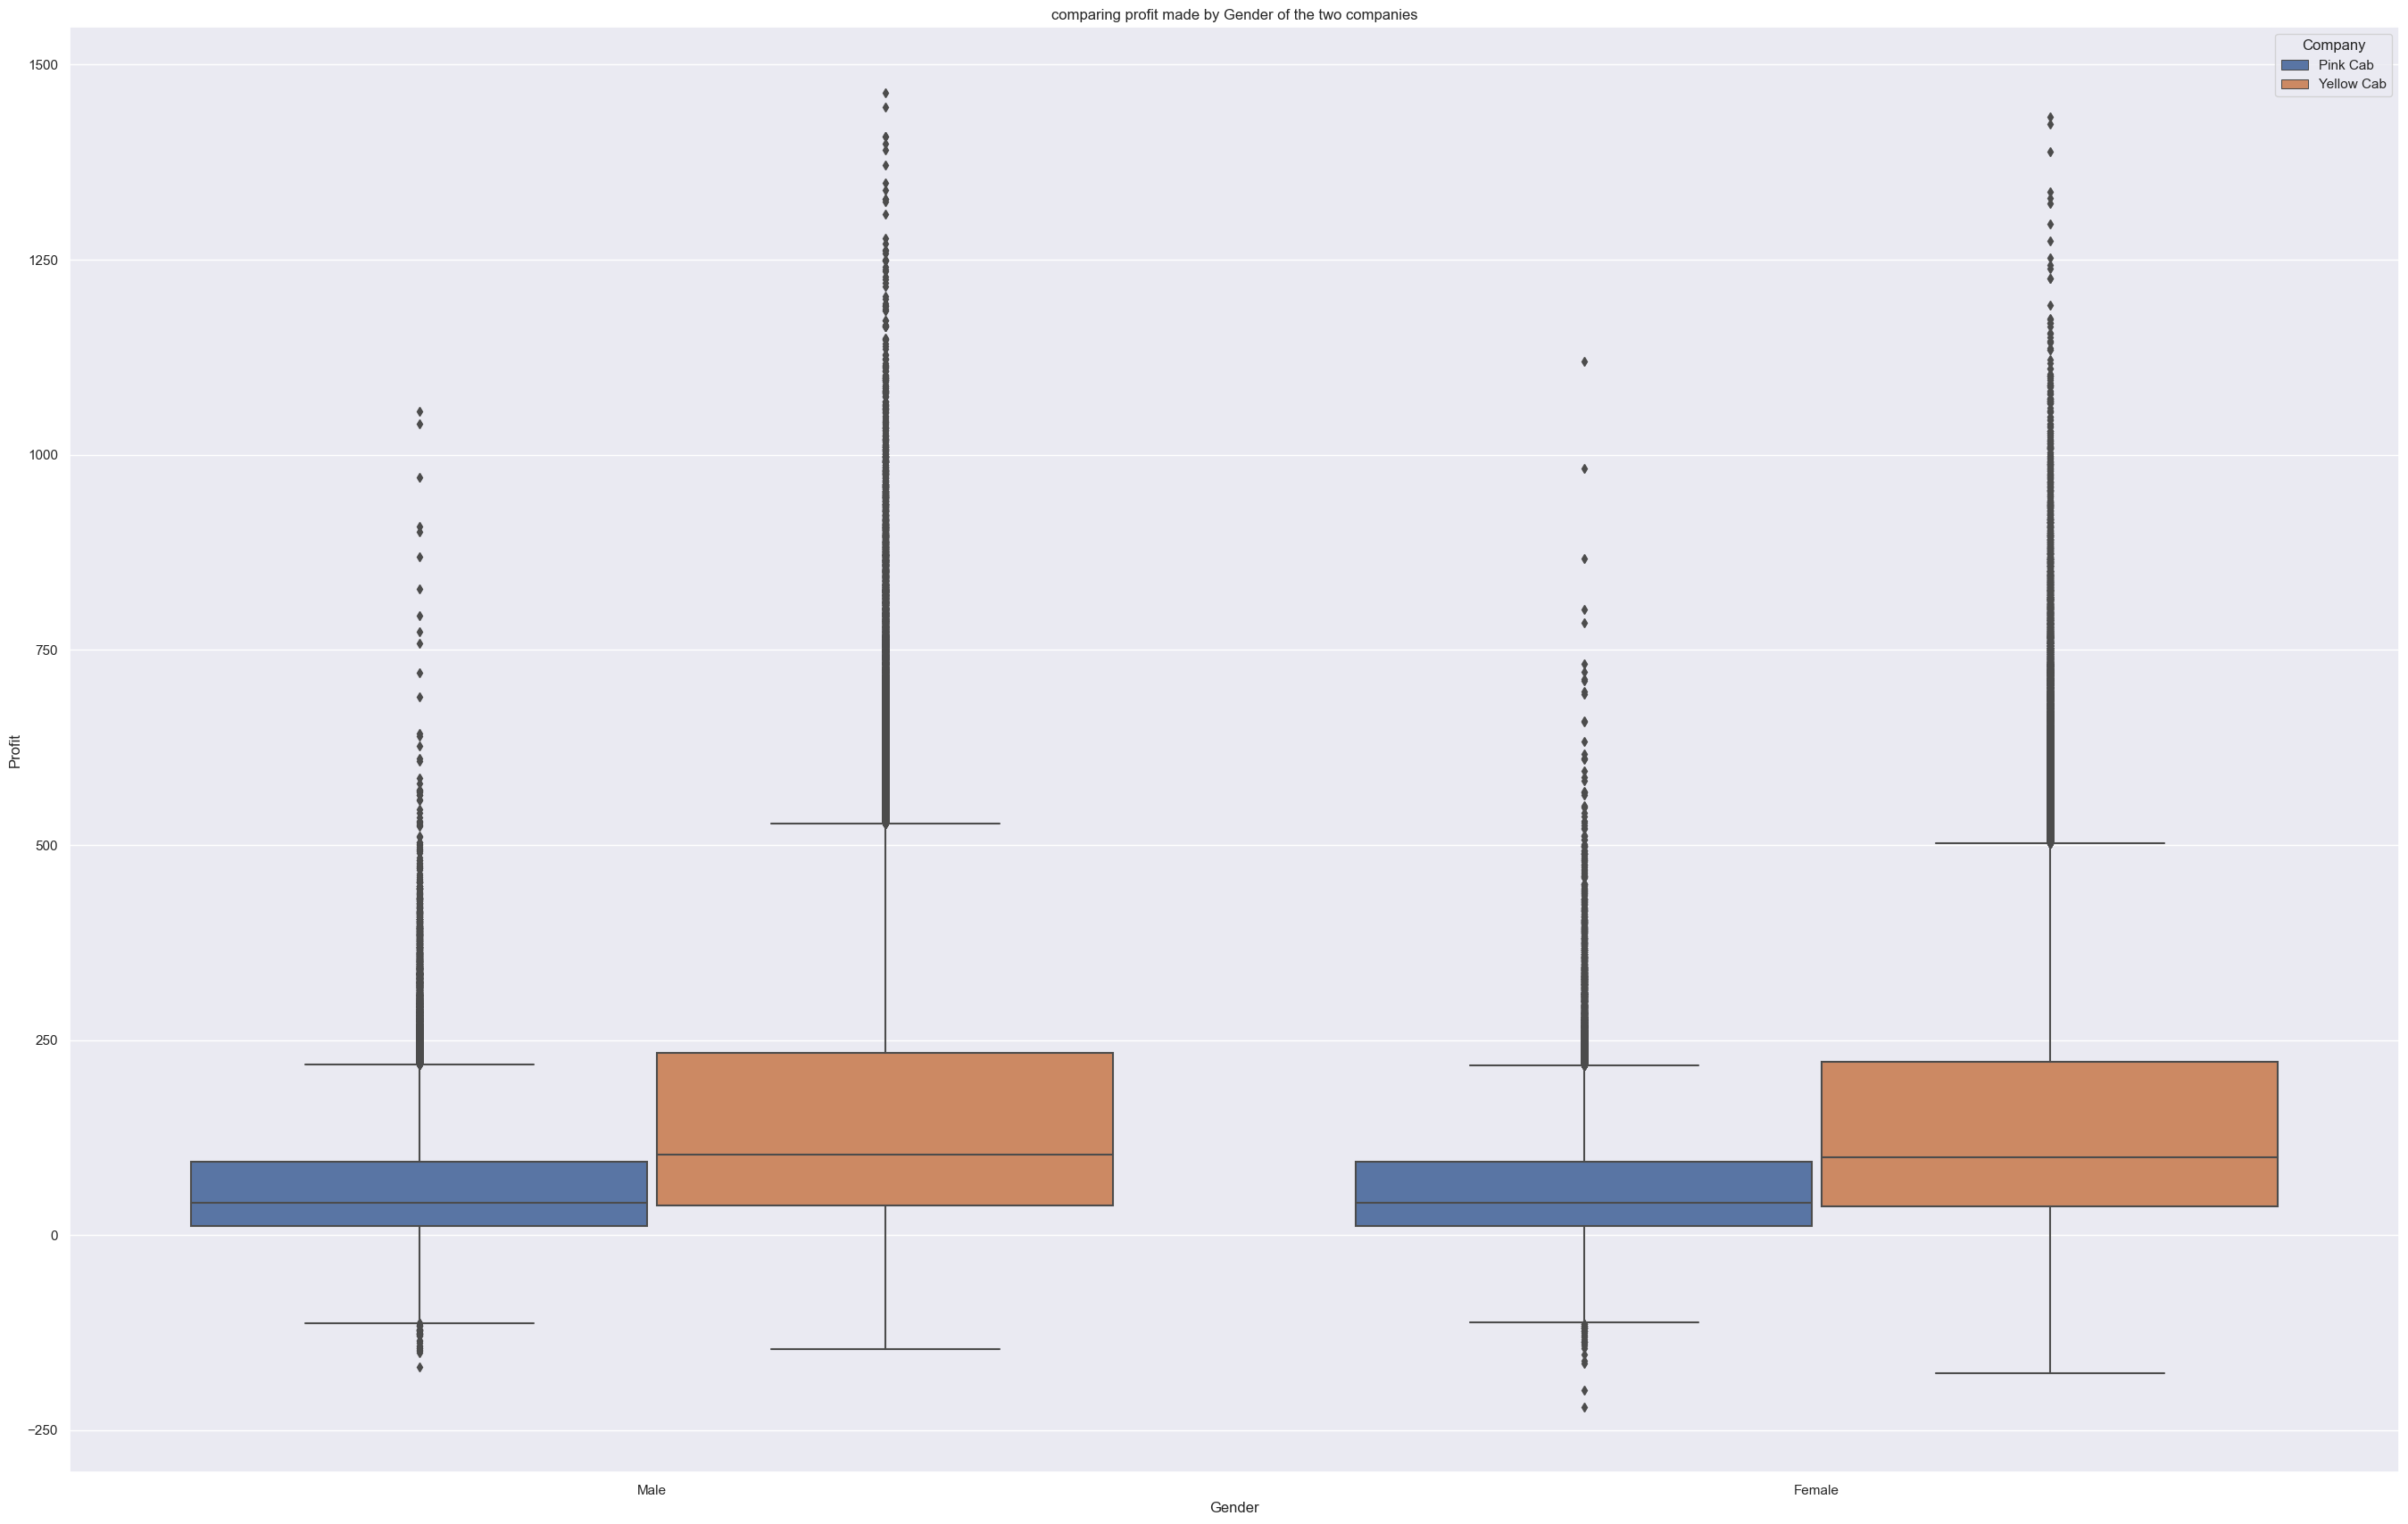

In [32]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Gender', y='Profit', hue='Company', data=xyz)
plt.title('comparing profit made by Gender of the two companies')
plt.savefig('comparing the profit made by Genders for the companies')

The male in each company make the highest profit

CREATING HYPOTHESIS TO INVESTIGATE

<<<HYPOTHESIS1>>>
<<CHECK IF THERE IS DIFFERENCE IN PROFIT WITH REGARDS TO AGE>>
H0: There is no difference in Profit with regards to age of the the customer of the companies
H1: There is difference in Profit with regards to age of the the customer of the companies

In [33]:
#YELLOW CAB COMPANY

a = xyz[(xyz.Age <= 60)&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz.Age >= 60)&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
c = round(p_value,4)
print('P value is ', c)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

260356 17257
P value is  0.0001
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


In [34]:
#PINK CAB COMPANY

a = xyz[(xyz.Age <= 60)&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz.Age >= 60)&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
c = round(p_value,4)
print('P value is ', c)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4817
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


Age does not afect the profit of yellow cab company while it affects that of pink cab company

<<<HYPOTHESIS 2>>>
<<CHECK IF THERE IS DIFFERENCE IN PROFIT WITH REGARDS TO GENDER>>
H0: There is no difference in Profit with regards to gender of the the customer of the companies
H1: There is difference in Profit with regards to gender of the the customer of the companies

In [35]:
#YELLOW CAB COMPANY

a = xyz[(xyz.Gender == 'Male')&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz.Gender == 'Female')&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
c = round(p_value,4)
print('P value is ',c)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  0.0
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


In [36]:
#PINK CAB COMPANY

a = xyz[(xyz.Gender == 'Male')&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz.Gender == 'Female')&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
c = round(p_value,4)
print('P value is ',c)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.1152
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


Gender does not afect the profit of pink cab company while it affects that of yellow cab company

<<<HYPOTHESIS 3>>>
<<CHECK IF THERE IS DIFFERENCE IN PROFIT WITH REGARDS TO KM T>>
H0: There is no difference in Profit with regards to income of the the customer of the companies
H1: There is difference in Profit with regards to income of the the customer of the companies

In [52]:
#YELLOW CAB COMPANY

a = xyz[(xyz['Income (USD/Month)']<=15000)&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz['Income (USD/Month)']>=15000)&(xyz.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
#c = round(p_value,4)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding Income (USD/Month for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Income (USD/Month for Yellow Cab')

140617 134067
P value is  8.753577797266219e-10
We accept alternative hypothesis (H1) that there is a difference regarding Income (USD/Month for Yellow Cab


In [51]:
#PINK CAB COMPANY

a = xyz[(xyz['Income (USD/Month)']<=15000)&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = xyz[(xyz['Income (USD/Month)']>=15000)&(xyz.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)
#c = round(p_value,4)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding Income (USD/Month for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Income (USD/Month for Pink Cab')

43255 41457
P value is  0.04088167232447488
We accept alternative hypothesis (H1) that there is a difference regarding Income (USD/Month for Pink Cab
